In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import style
style.use('bmh')

from scipy.stats import chi2_contingency

# Load data

In [2]:
df = pd.read_csv('Datos préstamos.csv')
df.head()

,ID_prestamo,genero,estado_civil_casado,dependientes,educacion_universitaria,emprendedor,ingreso_postulante,ingreso_codeudor,monto_credito,plazo_credito,historia_crediticia,area_propiedad,aprobacion_credito
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_prestamo              614 non-null    object 
 1   genero                   601 non-null    object 
 2   estado_civil_casado      611 non-null    object 
 3   dependientes             599 non-null    object 
 4   educacion_universitaria  614 non-null    object 
 5   emprendedor              582 non-null    object 
 6   ingreso_postulante       614 non-null    int64  
 7   ingreso_codeudor         614 non-null    float64
 8   monto_credito            592 non-null    float64
 9   plazo_credito            600 non-null    float64
 10  historia_crediticia      564 non-null    float64
 11  area_propiedad           614 non-null    object 
 12  aprobacion_credito       614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# Count null values for each column
df.isnull().sum()

ID_prestamo                 0
genero                     13
estado_civil_casado         3
dependientes               15
educacion_universitaria     0
emprendedor                32
ingreso_postulante          0
ingreso_codeudor            0
monto_credito              22
plazo_credito              14
historia_crediticia        50
area_propiedad              0
aprobacion_credito          0
dtype: int64

In [5]:
df.nunique()

ID_prestamo                614
genero                       2
estado_civil_casado          2
dependientes                 4
educacion_universitaria      2
emprendedor                  2
ingreso_postulante         505
ingreso_codeudor           287
monto_credito              203
plazo_credito               10
historia_crediticia          2
area_propiedad               3
aprobacion_credito           2
dtype: int64

# Analysis of target variable

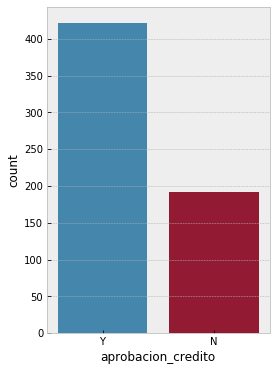

Y    422
N    192
Name: aprobacion_credito, dtype: int64
Y    68.729642
N    31.270358
Name: aprobacion_credito, dtype: float64


In [6]:
target = df['aprobacion_credito']

plt.figure(figsize=(4,6))
sb.countplot(target)
plt.show()

print(target.value_counts())
print(target.value_counts(normalize=True)*100)

# Analysis of categorical features

In [7]:
num_features = ['ingreso_postulante', 'ingreso_codeudor', 'monto_credito']

cat_features = ['genero', 'estado_civil_casado', 'dependientes', 'educacion_universitaria', 'emprendedor', 
                'plazo_credito', 'historia_crediticia', 'area_propiedad']

In [8]:
df[cat_features].nunique()

genero                      2
estado_civil_casado         2
dependientes                4
educacion_universitaria     2
emprendedor                 2
plazo_credito              10
historia_crediticia         2
area_propiedad              3
dtype: int64

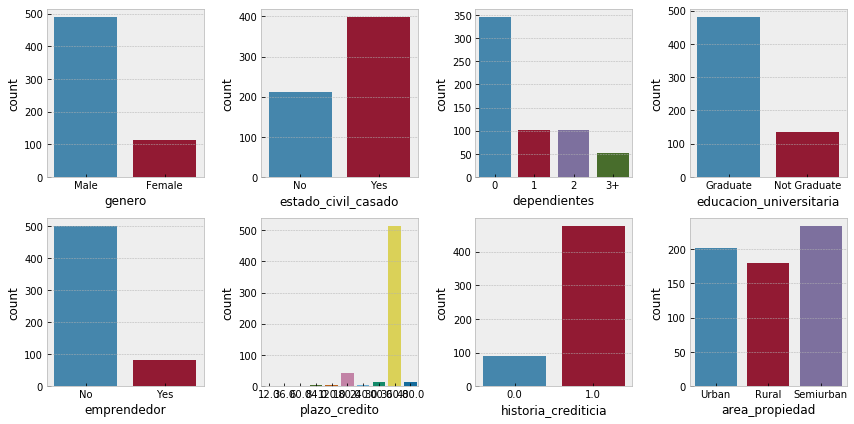

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
for i,col in enumerate(cat_features):
    plt.subplot(2, 4, i+1)
    sb.countplot(df[col])
    
plt.tight_layout()

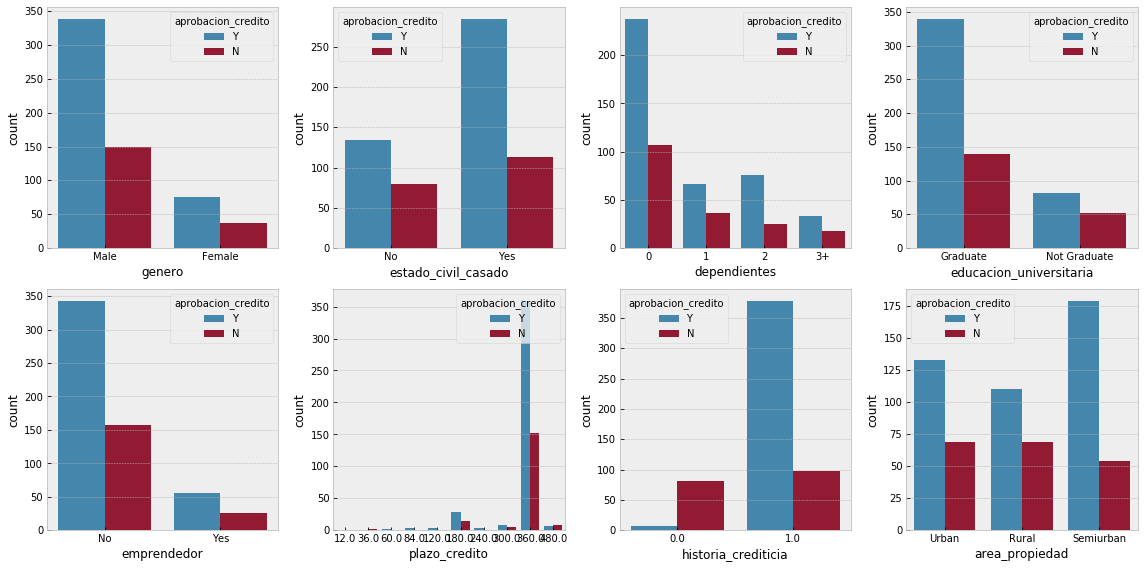

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
for i,col in enumerate(cat_features):
    plt.subplot(2, 4, i+1)
    sb.countplot(x=col, hue='aprobacion_credito', data=df)
    
plt.tight_layout()

In [11]:
# Define function to apply Pearson's Chi-Square test
def chi2_test(data, cat_var_01, cat_var_02):
    data = data[[cat_var_01, cat_var_02]].dropna()
    arr_list = []
    for category in data[cat_var_01].unique().tolist():
        arr = data[data[cat_var_01]==category][cat_var_02].value_counts().values.tolist()
        arr_list.append(arr)
    
    stat, p, dof, expected = chi2_contingency(arr_list)
    print('#'*5, "Pearson's Chi-Square test", '#'*5)
    print("p-value:", round(p,4)) 
    if p <= 0.05: 
        print('Observed frequencies are Dependent (reject H0)') 
    else: 
        print('Observed frequencies are Independent (H0 holds true)')

In [12]:
def analyze_cat_feature(feature):
    # Plot values for each category
    sb.countplot(x=feature, data=df)
    plt.show()
    
    # Count values for each category
    print(df[feature].value_counts())
    print(df[feature].value_counts(normalize=True)*100, '\n')
    
    # Plot values for each category divided by target classes
    sb.countplot(x=feature, hue='aprobacion_credito', data=df)
    plt.show()
    
    # Count values for each category divided by target classes
    for cat in df[feature].unique().tolist():
        print('#'*5, cat, '#'*5)
        print(df[df[feature]==cat]['aprobacion_credito'].value_counts())
        print(df[df[feature]==cat]['aprobacion_credito'].value_counts(normalize=True)*100, '\n')
        
    # Count null values by target classes
    print('#'*5, 'Count null values by target classes:', '#'*5)
    print(df[df[feature].isnull()]['aprobacion_credito'].value_counts())
    print(df[df[feature].isnull()]['aprobacion_credito'].value_counts(normalize=True)*100, '\n')

## genero

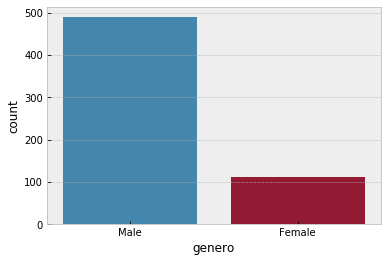

Male      489
Female    112
Name: genero, dtype: int64
Male      81.364393
Female    18.635607
Name: genero, dtype: float64 



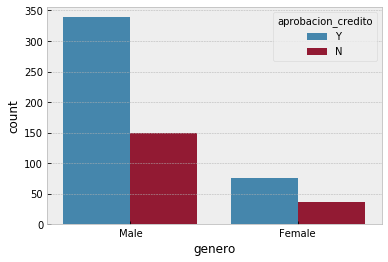

##### Male #####
Y    339
N    150
Name: aprobacion_credito, dtype: int64
Y    69.325153
N    30.674847
Name: aprobacion_credito, dtype: float64 

##### Female #####
Y    75
N    37
Name: aprobacion_credito, dtype: int64
Y    66.964286
N    33.035714
Name: aprobacion_credito, dtype: float64 

##### nan #####
Series([], Name: aprobacion_credito, dtype: int64)
Series([], Name: aprobacion_credito, dtype: float64) 

##### Count null values by target classes: #####
Y    8
N    5
Name: aprobacion_credito, dtype: int64
Y    61.538462
N    38.461538
Name: aprobacion_credito, dtype: float64 

##### Pearson's Chi-Square test #####
p-value: 0.7087
Observed frequencies are Independent (H0 holds true)


In [13]:
analyze_cat_feature('genero')
chi2_test(df, 'genero', 'aprobacion_credito')

## estado_civil_casado

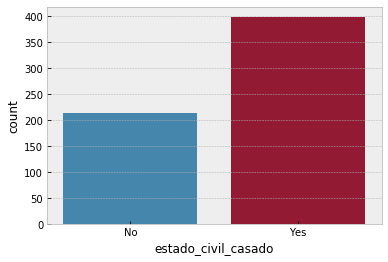

Yes    398
No     213
Name: estado_civil_casado, dtype: int64
Yes    65.139116
No     34.860884
Name: estado_civil_casado, dtype: float64 



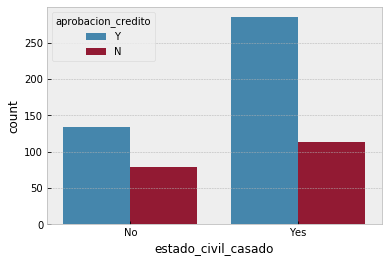

##### No #####
Y    134
N     79
Name: aprobacion_credito, dtype: int64
Y    62.910798
N    37.089202
Name: aprobacion_credito, dtype: float64 

##### Yes #####
Y    285
N    113
Name: aprobacion_credito, dtype: int64
Y    71.60804
N    28.39196
Name: aprobacion_credito, dtype: float64 

##### nan #####
Series([], Name: aprobacion_credito, dtype: int64)
Series([], Name: aprobacion_credito, dtype: float64) 

##### Count null values by target classes: #####
Y    3
Name: aprobacion_credito, dtype: int64
Y    100.0
Name: aprobacion_credito, dtype: float64 

##### Pearson's Chi-Square test #####
p-value: 0.0344
Observed frequencies are Dependent (reject H0)


In [14]:
analyze_cat_feature('estado_civil_casado')
chi2_test(df, 'estado_civil_casado', 'aprobacion_credito')

## dependientes

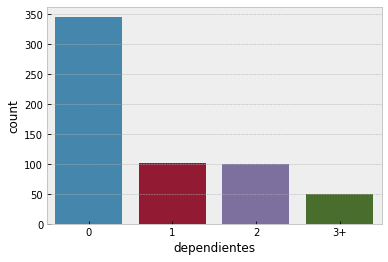

0     345
1     102
2     101
3+     51
Name: dependientes, dtype: int64
0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: dependientes, dtype: float64 



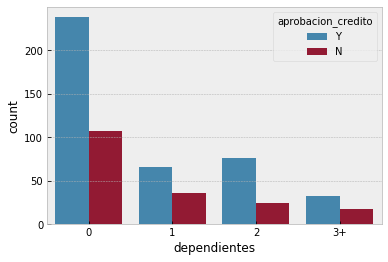

##### 0 #####
Y    238
N    107
Name: aprobacion_credito, dtype: int64
Y    68.985507
N    31.014493
Name: aprobacion_credito, dtype: float64 

##### 1 #####
Y    66
N    36
Name: aprobacion_credito, dtype: int64
Y    64.705882
N    35.294118
Name: aprobacion_credito, dtype: float64 

##### 2 #####
Y    76
N    25
Name: aprobacion_credito, dtype: int64
Y    75.247525
N    24.752475
Name: aprobacion_credito, dtype: float64 

##### 3+ #####
Y    33
N    18
Name: aprobacion_credito, dtype: int64
Y    64.705882
N    35.294118
Name: aprobacion_credito, dtype: float64 

##### nan #####
Series([], Name: aprobacion_credito, dtype: int64)
Series([], Name: aprobacion_credito, dtype: float64) 

##### Count null values by target classes: #####
Y    9
N    6
Name: aprobacion_credito, dtype: int64
Y    60.0
N    40.0
Name: aprobacion_credito, dtype: float64 

##### Pearson's Chi-Square test #####
p-value: 0.3679
Observed frequencies are Independent (H0 holds true)


In [15]:
analyze_cat_feature('dependientes')
chi2_test(df, 'dependientes', 'aprobacion_credito')

## educacion_universitaria

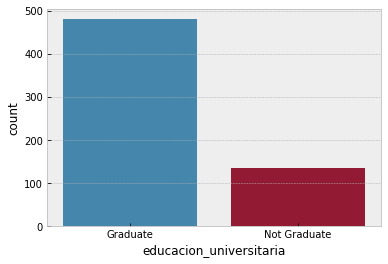

Graduate        480
Not Graduate    134
Name: educacion_universitaria, dtype: int64
Graduate        78.175896
Not Graduate    21.824104
Name: educacion_universitaria, dtype: float64 



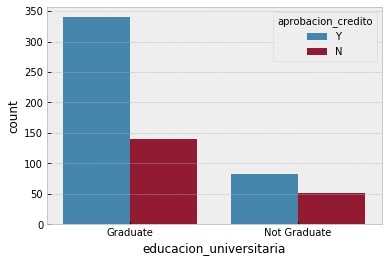

##### Graduate #####
Y    340
N    140
Name: aprobacion_credito, dtype: int64
Y    70.833333
N    29.166667
Name: aprobacion_credito, dtype: float64 

##### Not Graduate #####
Y    82
N    52
Name: aprobacion_credito, dtype: int64
Y    61.19403
N    38.80597
Name: aprobacion_credito, dtype: float64 

##### Count null values by target classes: #####
Series([], Name: aprobacion_credito, dtype: int64)
Series([], Name: aprobacion_credito, dtype: float64) 

##### Pearson's Chi-Square test #####
p-value: 0.0431
Observed frequencies are Dependent (reject H0)


In [16]:
analyze_cat_feature('educacion_universitaria')
chi2_test(df, 'educacion_universitaria', 'aprobacion_credito')

## emprendedor

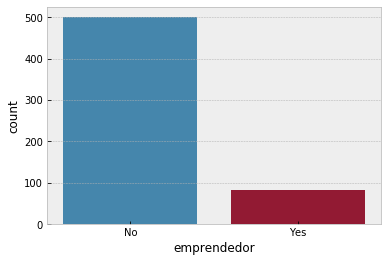

No     500
Yes     82
Name: emprendedor, dtype: int64
No     85.910653
Yes    14.089347
Name: emprendedor, dtype: float64 



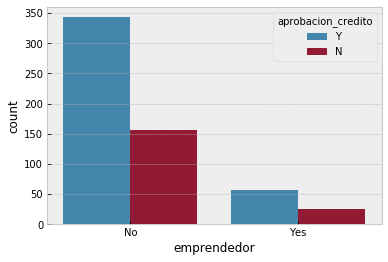

##### No #####
Y    343
N    157
Name: aprobacion_credito, dtype: int64
Y    68.6
N    31.4
Name: aprobacion_credito, dtype: float64 

##### Yes #####
Y    56
N    26
Name: aprobacion_credito, dtype: int64
Y    68.292683
N    31.707317
Name: aprobacion_credito, dtype: float64 

##### nan #####
Series([], Name: aprobacion_credito, dtype: int64)
Series([], Name: aprobacion_credito, dtype: float64) 

##### Count null values by target classes: #####
Y    23
N     9
Name: aprobacion_credito, dtype: int64
Y    71.875
N    28.125
Name: aprobacion_credito, dtype: float64 

##### Pearson's Chi-Square test #####
p-value: 0.942
Observed frequencies are Independent (H0 holds true)


In [17]:
analyze_cat_feature('emprendedor')
chi2_test(df, 'emprendedor', 'aprobacion_credito')

## plazo_credito

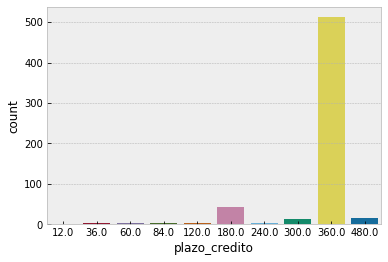

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: plazo_credito, dtype: int64
360.0    85.333333
180.0     7.333333
480.0     2.500000
300.0     2.166667
84.0      0.666667
240.0     0.666667
120.0     0.500000
36.0      0.333333
60.0      0.333333
12.0      0.166667
Name: plazo_credito, dtype: float64 



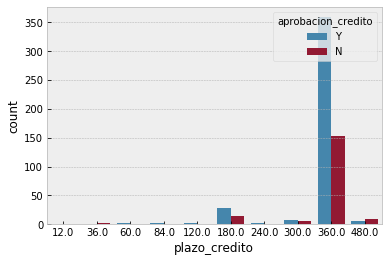

##### 360.0 #####
Y    359
N    153
Name: aprobacion_credito, dtype: int64
Y    70.117188
N    29.882812
Name: aprobacion_credito, dtype: float64 

##### 120.0 #####
Y    3
Name: aprobacion_credito, dtype: int64
Y    100.0
Name: aprobacion_credito, dtype: float64 

##### 240.0 #####
Y    3
N    1
Name: aprobacion_credito, dtype: int64
Y    75.0
N    25.0
Name: aprobacion_credito, dtype: float64 

##### nan #####
Series([], Name: aprobacion_credito, dtype: int64)
Series([], Name: aprobacion_credito, dtype: float64) 

##### 180.0 #####
Y    29
N    15
Name: aprobacion_credito, dtype: int64
Y    65.909091
N    34.090909
Name: aprobacion_credito, dtype: float64 

##### 60.0 #####
Y    2
Name: aprobacion_credito, dtype: int64
Y    100.0
Name: aprobacion_credito, dtype: float64 

##### 300.0 #####
Y    8
N    5
Name: aprobacion_credito, dtype: int64
Y    61.538462
N    38.461538
Name: aprobacion_credito, dtype: float64 

##### 480.0 #####
N    9
Y    6
Name: aprobacion_credito, dtype: int64


In [18]:
analyze_cat_feature('plazo_credito')

In [19]:
# Reduce number of categories for this feature from 10 to 2.
df['plazo_credito'] = np.where(df['plazo_credito']==360.0, '360', 'Other')

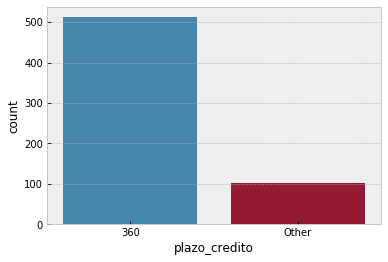

360      512
Other    102
Name: plazo_credito, dtype: int64
360      83.387622
Other    16.612378
Name: plazo_credito, dtype: float64 



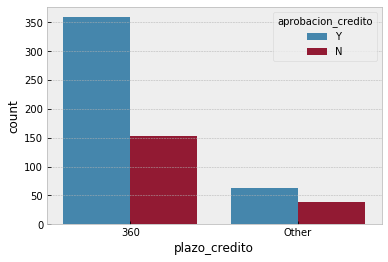

##### 360 #####
Y    359
N    153
Name: aprobacion_credito, dtype: int64
Y    70.117188
N    29.882812
Name: aprobacion_credito, dtype: float64 

##### Other #####
Y    63
N    39
Name: aprobacion_credito, dtype: int64
Y    61.764706
N    38.235294
Name: aprobacion_credito, dtype: float64 

##### Count null values by target classes: #####
Series([], Name: aprobacion_credito, dtype: int64)
Series([], Name: aprobacion_credito, dtype: float64) 

##### Pearson's Chi-Square test #####
p-value: 0.1224
Observed frequencies are Independent (H0 holds true)


In [20]:
analyze_cat_feature('plazo_credito')
chi2_test(df, 'plazo_credito', 'aprobacion_credito')

## historia_crediticia

In [21]:
# Convert float values to categorical
float_to_cat = {1.0: 'Yes', 0.0: 'No'}
df['historia_crediticia'] = df['historia_crediticia'].map(float_to_cat)

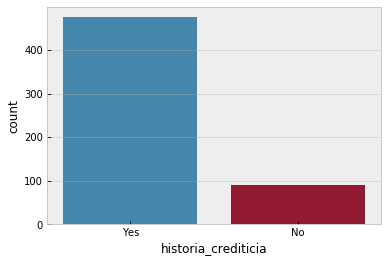

Yes    475
No      89
Name: historia_crediticia, dtype: int64
Yes    84.219858
No     15.780142
Name: historia_crediticia, dtype: float64 



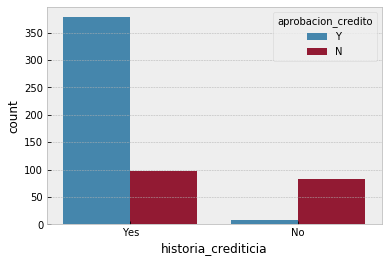

##### Yes #####
Y    378
N     97
Name: aprobacion_credito, dtype: int64
Y    79.578947
N    20.421053
Name: aprobacion_credito, dtype: float64 

##### No #####
N    82
Y     7
Name: aprobacion_credito, dtype: int64
N    92.134831
Y     7.865169
Name: aprobacion_credito, dtype: float64 

##### nan #####
Series([], Name: aprobacion_credito, dtype: int64)
Series([], Name: aprobacion_credito, dtype: float64) 

##### Count null values by target classes: #####
Y    37
N    13
Name: aprobacion_credito, dtype: int64
Y    74.0
N    26.0
Name: aprobacion_credito, dtype: float64 

##### Pearson's Chi-Square test #####
p-value: 0.008
Observed frequencies are Dependent (reject H0)


In [22]:
analyze_cat_feature('historia_crediticia')
chi2_test(df, 'historia_crediticia', 'aprobacion_credito')

In [23]:
# Create a new category for null values
df['historia_crediticia'] = df['historia_crediticia'].fillna('Unknown')

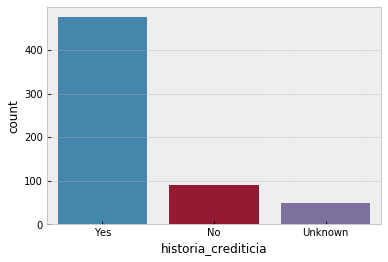

Yes        475
No          89
Unknown     50
Name: historia_crediticia, dtype: int64
Yes        77.361564
No         14.495114
Unknown     8.143322
Name: historia_crediticia, dtype: float64 



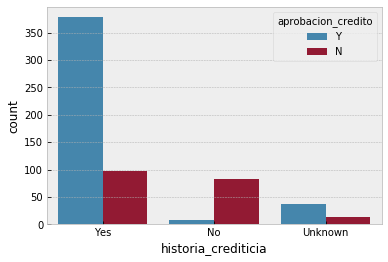

##### Yes #####
Y    378
N     97
Name: aprobacion_credito, dtype: int64
Y    79.578947
N    20.421053
Name: aprobacion_credito, dtype: float64 

##### No #####
N    82
Y     7
Name: aprobacion_credito, dtype: int64
N    92.134831
Y     7.865169
Name: aprobacion_credito, dtype: float64 

##### Unknown #####
Y    37
N    13
Name: aprobacion_credito, dtype: int64
Y    74.0
N    26.0
Name: aprobacion_credito, dtype: float64 

##### Count null values by target classes: #####
Series([], Name: aprobacion_credito, dtype: int64)
Series([], Name: aprobacion_credito, dtype: float64) 

##### Pearson's Chi-Square test #####
p-value: 0.0093
Observed frequencies are Dependent (reject H0)


In [24]:
analyze_cat_feature('historia_crediticia')
chi2_test(df, 'historia_crediticia', 'aprobacion_credito')

## area_propiedad

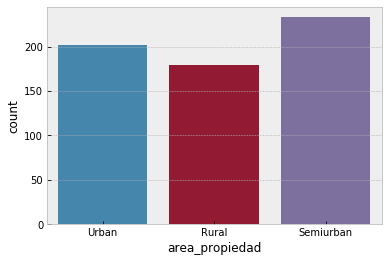

Semiurban    233
Urban        202
Rural        179
Name: area_propiedad, dtype: int64
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: area_propiedad, dtype: float64 



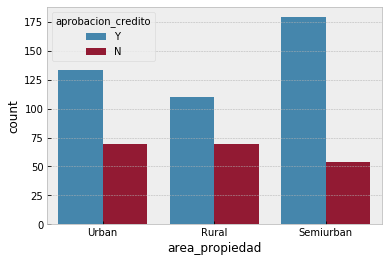

##### Urban #####
Y    133
N     69
Name: aprobacion_credito, dtype: int64
Y    65.841584
N    34.158416
Name: aprobacion_credito, dtype: float64 

##### Rural #####
Y    110
N     69
Name: aprobacion_credito, dtype: int64
Y    61.452514
N    38.547486
Name: aprobacion_credito, dtype: float64 

##### Semiurban #####
Y    179
N     54
Name: aprobacion_credito, dtype: int64
Y    76.824034
N    23.175966
Name: aprobacion_credito, dtype: float64 

##### Count null values by target classes: #####
Series([], Name: aprobacion_credito, dtype: int64)
Series([], Name: aprobacion_credito, dtype: float64) 

##### Pearson's Chi-Square test #####
p-value: 0.0021
Observed frequencies are Dependent (reject H0)


In [25]:
analyze_cat_feature('area_propiedad')
chi2_test(df, 'area_propiedad', 'aprobacion_credito')

# Analysis of numerical features

In [26]:
num_df = df[num_features + ['aprobacion_credito']]

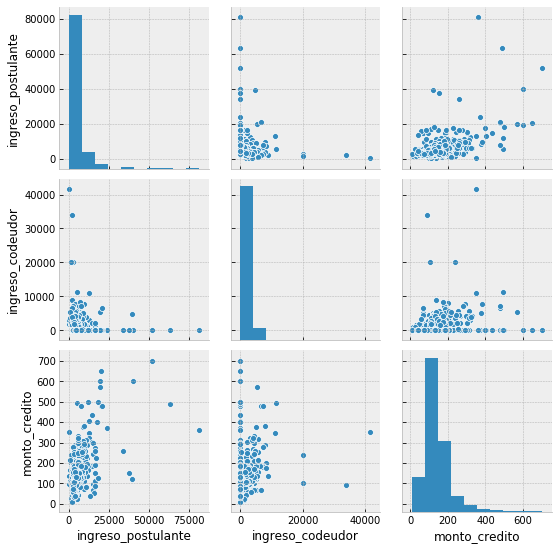

In [27]:
sb.pairplot(df[num_features])
plt.show()

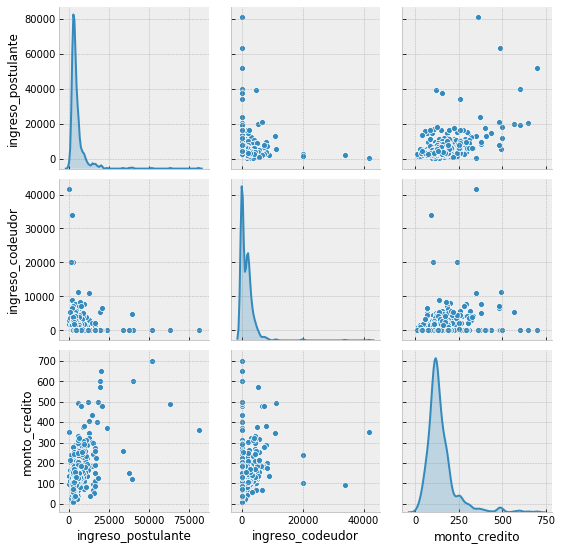

In [28]:
sb.pairplot(df[num_features], diag_kind='kde')
plt.show()

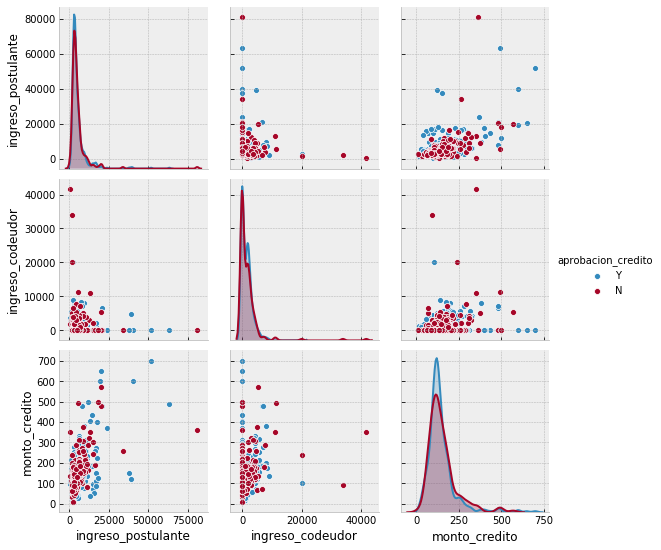

In [29]:
sb.pairplot(num_df, hue='aprobacion_credito')
plt.show()

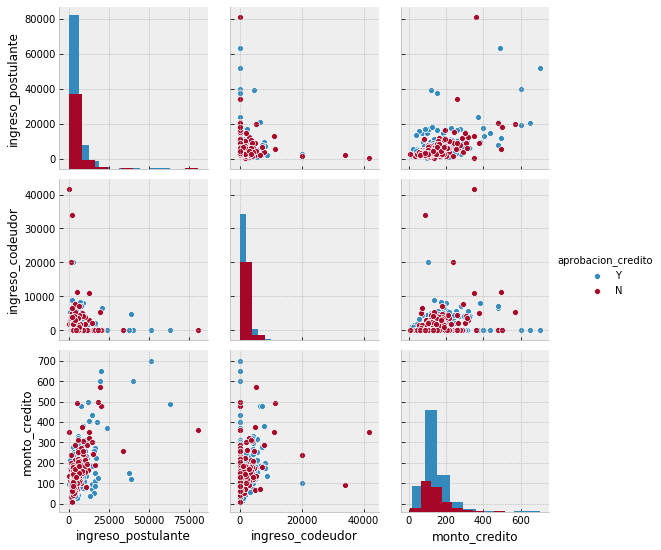

In [30]:
sb.pairplot(num_df, hue='aprobacion_credito', diag_kind='hist')
plt.show()

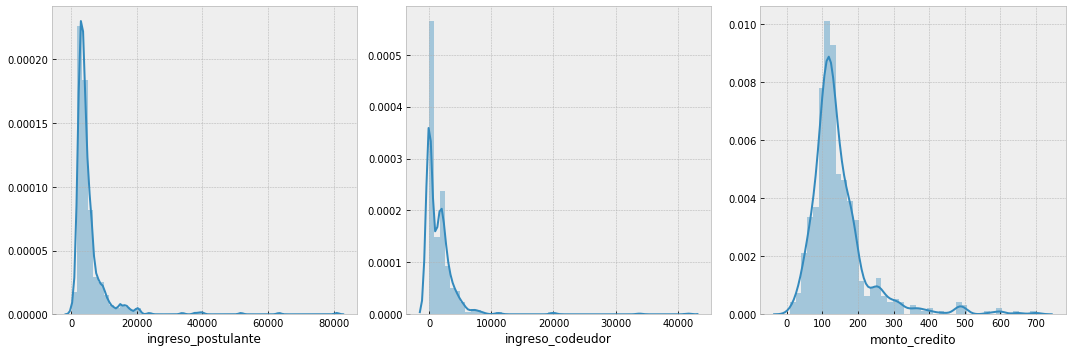

In [31]:
fig, ax = plt.subplots(figsize=(15, 5))
for i,col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sb.distplot(df[col])
    
plt.tight_layout()

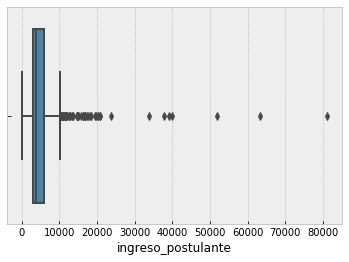

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ingreso_postulante, dtype: float64 



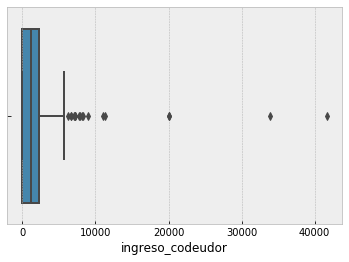

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: ingreso_codeudor, dtype: float64 



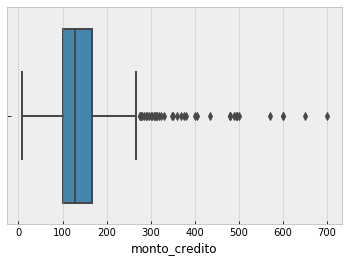

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: monto_credito, dtype: float64 



In [32]:
for feature in num_features:
    sb.boxplot(df[feature])
    plt.show()
    print(df[feature].describe(), '\n')

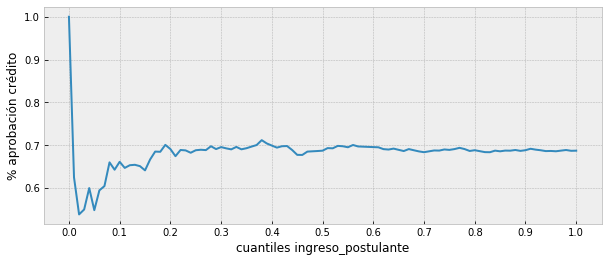

Min value: 53.85 %


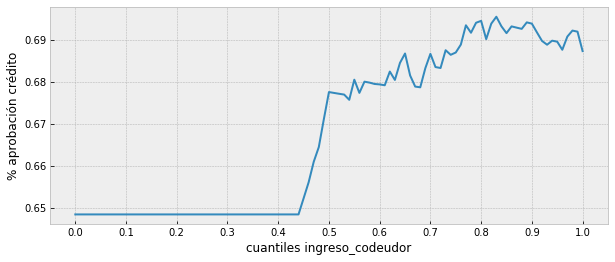

Min value: 64.84 %


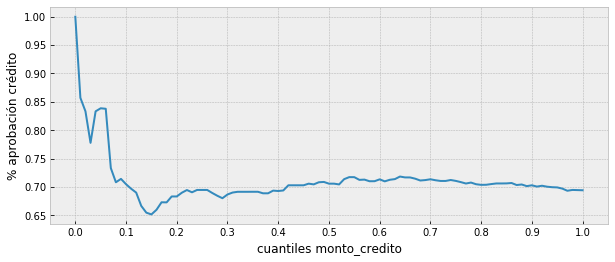

Min value: 65.17 %


In [33]:
for feature in num_features:
    series = df[feature]

    q_list = np.arange(0.0, 1.01, 0.01)
    q_values = []
    for q in q_list:
        value = series.quantile(q)
        q_value = df[series<=value]['aprobacion_credito'].value_counts(normalize=True)[0]
        q_values.append(q_value)
    
    plt.figure(figsize=(10,4))
    plt.plot(q_list, q_values)
    plt.xticks(q_list[0::10])
    plt.xlabel('cuantiles {}'.format(feature), size=12)
    plt.ylabel('% aprobación crédito', size=12)
    plt.show()

    print('Min value:', round(min(q_values)*100, 2), '%')

## Create new variable "tiene_codeudor"

In [34]:
df['tiene_codeudor'] = np.where(df['ingreso_codeudor']==0, 'No', 'Yes')

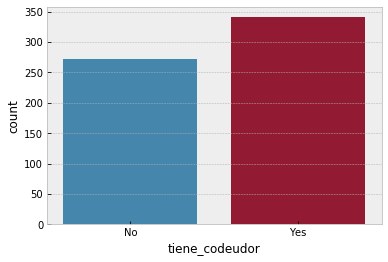

Yes    341
No     273
Name: tiene_codeudor, dtype: int64
Yes    55.537459
No     44.462541
Name: tiene_codeudor, dtype: float64 



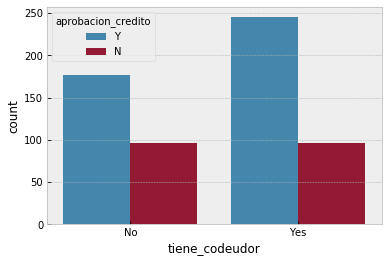

##### No #####
Y    177
N     96
Name: aprobacion_credito, dtype: int64
Y    64.835165
N    35.164835
Name: aprobacion_credito, dtype: float64 

##### Yes #####
Y    245
N     96
Name: aprobacion_credito, dtype: int64
Y    71.847507
N    28.152493
Name: aprobacion_credito, dtype: float64 

##### Count null values by target classes: #####
Series([], Name: aprobacion_credito, dtype: int64)
Series([], Name: aprobacion_credito, dtype: float64) 

##### Pearson's Chi-Square test #####
p-value: 0.0759
Observed frequencies are Independent (H0 holds true)


In [35]:
analyze_cat_feature('tiene_codeudor')
chi2_test(df, 'tiene_codeudor', 'aprobacion_credito')

# Power transformation for numerical variables

In [36]:
# Fill null values for "monto_credito" with the mean value
df['monto_credito'] = df['monto_credito'].fillna(df['monto_credito'].mean())

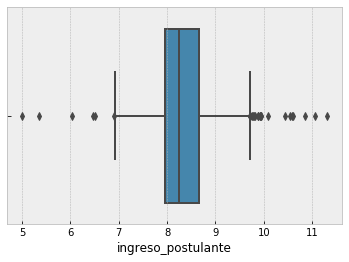

count    614.000000
mean       8.341213
std        0.645263
min        5.010635
25%        7.964677
50%        8.246040
75%        8.664750
max       11.302204
Name: ingreso_postulante, dtype: float64 



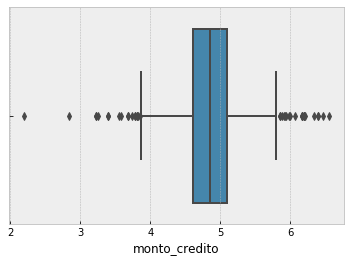

count    614.000000
mean       4.862066
std        0.496575
min        2.197225
25%        4.607658
50%        4.859812
75%        5.104426
max        6.551080
Name: monto_credito, dtype: float64 



In [37]:
for feature in ['ingreso_postulante', 'monto_credito']:
    series = np.log(df[feature])
    sb.boxplot(series)
    plt.show()
    print(series.describe(), '\n')